In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

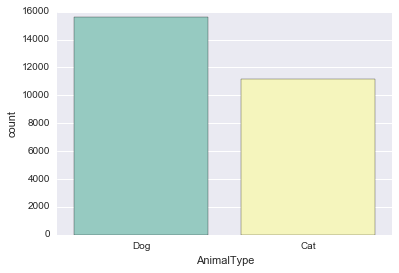

In [3]:
sns.countplot(train.AnimalType, palette='Set3')

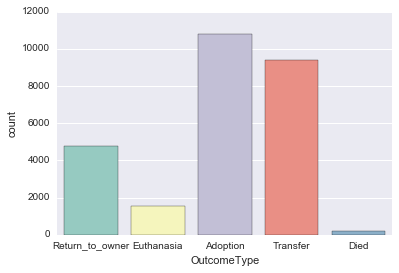

In [4]:
sns.countplot(train.OutcomeType, palette='Set3')

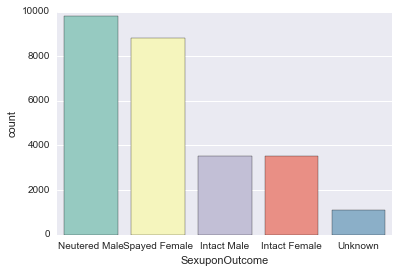

In [5]:
sns.countplot(train.SexuponOutcome, palette='Set3')

In [6]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

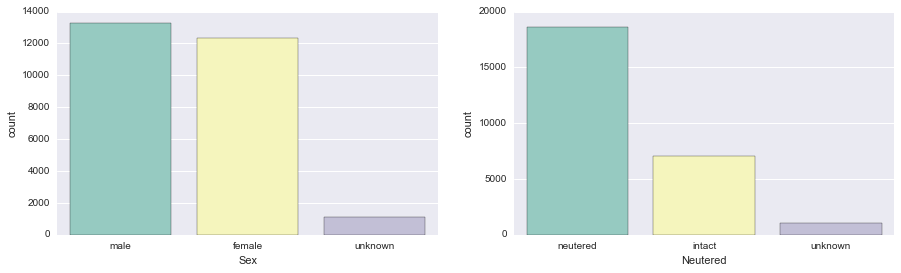

In [12]:
train['Sex'] = train.SexuponOutcome.apply(get_sex)
train['Neutered'] = train.SexuponOutcome.apply(get_neutered)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(train.Sex, palette='Set3', ax=ax1)
sns.countplot(train.Neutered, palette='Set3', ax=ax2);

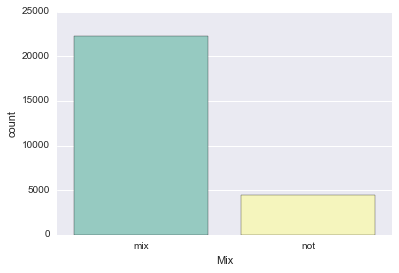

In [11]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
train['Mix'] = train.Breed.apply(get_mix)
sns.countplot(train.Mix, palette='Set3');

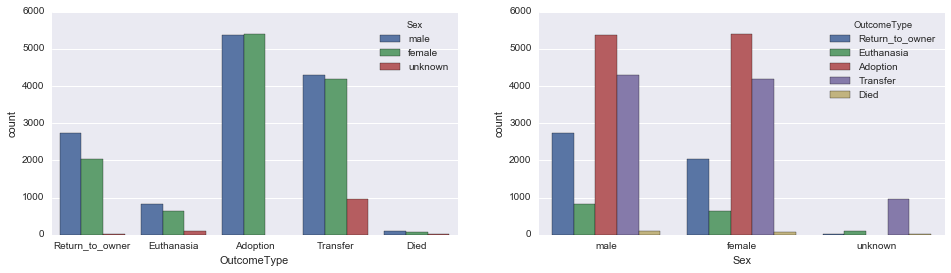

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=train, x='Sex',hue='OutcomeType', ax=ax2);

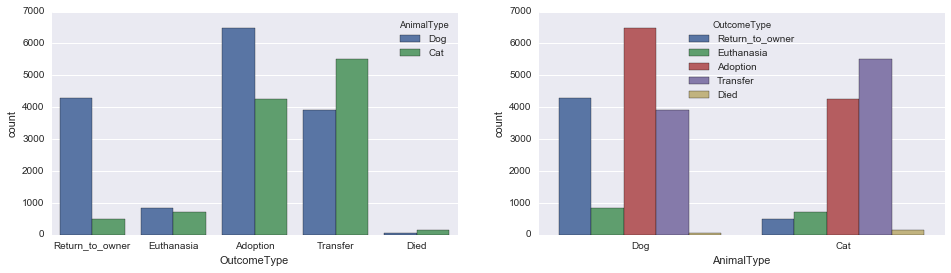

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=train, x='AnimalType',hue='OutcomeType', ax=ax2);

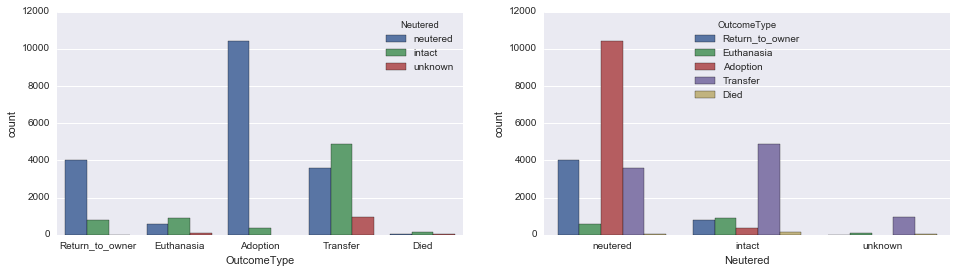

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=train, x='Neutered',hue='OutcomeType', ax=ax2);

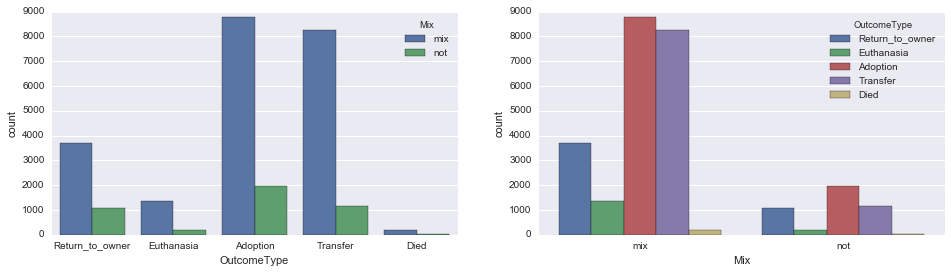

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Mix', ax=ax1)
sns.countplot(data=train, x='Mix',hue='OutcomeType', ax=ax2);

In [18]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

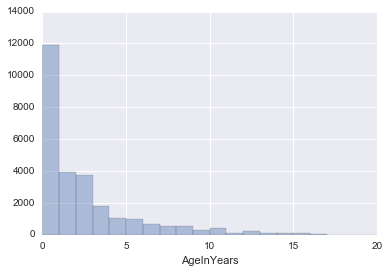

In [23]:
train['AgeInYears'] = train.AgeuponOutcome.apply(calc_age_in_years)
ls = sns.distplot(train.AgeInYears, bins = 20, kde=False)

axes = ls.axes
axes.set_ylim(0, 14000);

In [24]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'

train['AgeCategory'] = train.AgeInYears.apply(calc_age_category)

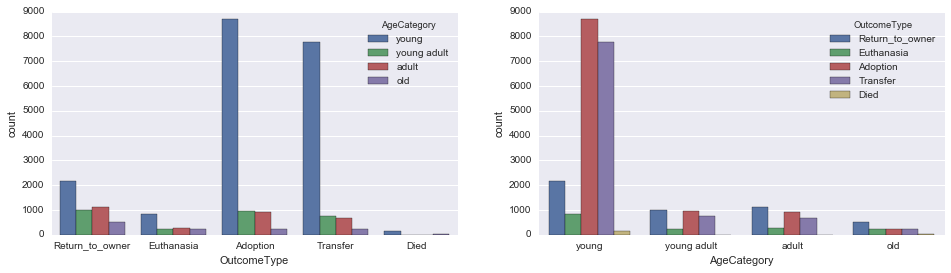

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='AgeCategory', ax=ax1)
sns.countplot(data=train, x='AgeCategory',hue='OutcomeType', ax=ax2);